### 分類アルゴリズムの選択

分類器の性能(予測能力と計算能力)は学習に利用可能なデータに大きく依存する

機械学習のアルゴリズムのトレーニングは主要な5つの手順で構成される

1,特徴量を選択し、トレーニングサンプルを収集する

2,性能指標を選択する

3,分類器と最適化アルゴリズムを選択する

4,モデルの性能を評価する

5, アルゴリズムを評価する

In [4]:
#パーセプトロンのトレーニング

from sklearn import datasets
import numpy as np

iris=datasets.load_iris()

#がく片の長さと花びらの長さを特徴量Xに代入、対する品種のクラスラベルをyに代入
X=iris.data[:,[2,3]]
y=iris.target

print('Class labels : ',np.unique(y))

Class labels :  [0 1 2]


In [7]:
#yにはアヤメの花のクラス名であるIris-setosa,Iris-versicolor,Iris-virginicaが[0,1,2]として格納されている
#メモリ消費を抑えて計算性能を上げるため整数のラベルを使用する事が推奨
#ほとんどの機械学習ライブラリではクラスラベルを整数として符号化する事が慣例となっている

#データセットをさらにトレーニングデータ、テストデータに分割

from sklearn.model_selection import train_test_split
#全体の30%をテストデータにする

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

print('Labels counts in y:',np.bincount(y))
print('Labels counts in y_train: ',np.bincount(y_train))
print('Labels counts in y_test',np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train:  [35 35 35]
Labels counts in y_test [15 15 15]


In [8]:
#機械学習と最適化の多くのアルゴリズムでは、最適な性能を得るために特徴量のスケーリングも必要となる
#scikit-learnのpreprocessingモジュールのStandardScalerクラスを使って特量量を標準化する

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

#トレーニングデータの平均と標準偏差を計算
sc.fit(X_train)

#平均と標準偏差を用いて標準化
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [10]:
#トレーニングデータを標準化したところでパーセプトロンモデルをトレーニングできる状態になる。
#scikit-learnのほとんどのアルゴリズムは多クラス分類をデフォルトでサポートしている。
#1対他(OvR)手法が使用されるため、3つの品種のクラスをパーセプトロンに同時に与える事ができる
    
from sklearn.linear_model import Perceptron

#エポック数40 学習率0.1でパーセプトロンのインスタンスを生成
ppn=Perceptron(n_iter=40,eta0=0.1,random_state=42)

ppn.fit(X_train_std,y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=40, n_jobs=1, penalty=None, random_state=42,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [12]:
#予測を行う
y_pred=ppn.predict(X_test_std)

#誤分類のサンプルの個数を表示

print('Missclassed samples : {}'.format((y_test != y_pred).sum()))

Missclassed samples : 4


サンプルのうち45つを誤分類する事が分かった

#### 機械学習では誤分類率を報告するのではなくモデルの正解率を報告する

モデルの正解率は誤分類率を1から引いたもので次のように計算する

正解率　= 1-[誤分類率]

scikit-learnでは、metricsモジュールによりさまざまな性能指標を計算する機能が実装されている

テストデータセットでのパーセプトロンの正解率

In [14]:
from sklearn.metrics import accuracy_score

#分類器の正解率を表示
print('Accuracy : %2f'% accuracy_score(y_test,y_pred))

Accuracy : 0.911111


In [15]:
#scikit-learnのscoreメソッドと組み合わせる事で分類器の正解率を計算する
print('Accuracy;%2f'%ppn.score(X_test_std,y_test))

Accuracy;0.911111


In [27]:
#トレーニングしたパーセプトロンモデルの決定領域をプロットし、さまざまな品種のサンプルをどの程度識別できるのかを可視化

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    #マーカーとカラーマップの準備
    markers=('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    #決定領域のプロット
    x1_min,x1_max = X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max = X[:,1].min()-1,X[:,1].max()+1
    
    #グリッドポイントの生成
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),
                                            np.arange(x2_min,x2_max,resolution))
    
    #各特徴量を１次元配列に変換して予測を実行
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    
    #予測結果を元のグリッドポイントのデータサイズに変換
    Z=Z.reshape(xx1.shape)
    
    #グリッドポイントの等高線のプロット
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    
    #軸の範囲の指定
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #クラスごとにサンプルをプロット
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0 ] , y=X[y == cl , 1],
                           alpha=0.8,
                           c=colors[idx],
                           marker=markers[idx],
                           label=cl,
                           edgecolor='black')
        
    #テストサンプルを目立たせる
    if test_idx:
        #全てのサンプルをプロット
        X_test,y_test=X[test_idx, :] , y[test_idx]
        plt.scatter(X_test[: , 0] , X_test[:, 1],
                           c='',
                           edgecolor='black',
                           alpha=1.0,
                           linewidth=1,
                           marker='o',
                           s=100,
                           label='test set')

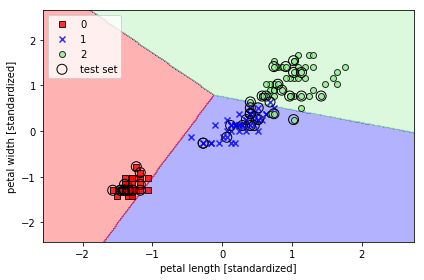

In [28]:
#トレーニングデータとテストデータhの特徴量を行方向に統合
X_combined_std = np.vstack((X_train_std,X_test_std))

#トレーニングデータとテストデータのクラスラベルを統合
y_combined = np.hstack((y_train,y_test))

#決定境界線のプロット
plot_decision_regions(X=X_combined_std,y=y_combined,classifier=ppn,test_idx=range(105,150))

#軸ラベルの設定
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')

#凡例の設定
plt.legend(loc='upper left')

#グラフの表示
plt.tight_layout()
plt.show()

### 結果
結果として得られたグラフからわかるように3つの品種を線形の決定境界で完全に区切る事ができない

完全に線形分離が不可能なデータセットでは、パーセプトロンアルゴリズムは決して収束しない